In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d
np.set_printoptions(threshold=np.inf)

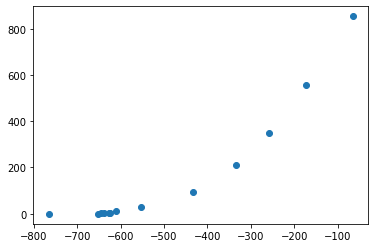

In [3]:
current = [854, 557, 351, 211, 92, 27, 12, 5, 5, 3, 3, 0, -1]
voltage = [-65, -172, -258, -335, -433, -552, -611, -625, -627, -639, -645, -652, -766]


plt.scatter(voltage, current) 
plt.show()

# Experiment 3

In [4]:
voltage_blue = np.flip(np.array([317,225,106,-22,-128,-235,-362,-486,-561,-639,-767,-841,-916,-925,-932,-940,-946,-953,-1110]))
current_blue = np.flip(np.array([6282,5556,4634,3625,2890,2219,1496,895,613,376,129,50,16,9,9,5,1,-1,-23]))

voltage_red = np.flip(np.array([830,687,523,408,355,244,111,-91,-173,-242,-257,-267,-331,-448,-584]))
current_red = np.flip(np.array([602,560,495,446,382,318,220,52,21,5,1,1,0,-1,-5]))

voltage_green = np.flip(np.array([553,441,323,230,123,-65,-172,-258,-335,-433,-552,-611,-625,-627,-639,-645,-652,-766]))
current_green = np.flip(np.array([2797,2460,2090,1801,1455,854,557,351,211,92,27,12,5,5,3,3,0,-1]))

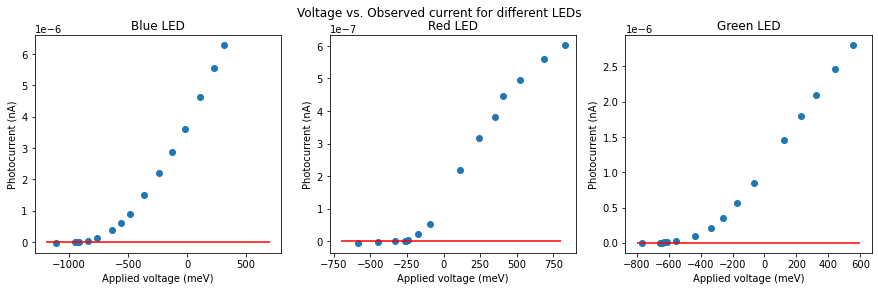

In [5]:
c = 1.6 * 10**(-19)

figure, axes = plt.subplots(1, 3)
figure.suptitle('Voltage vs. Observed current for different LEDs')
figure.set_figwidth(15)
axes[0].scatter(voltage_blue, current_blue * 1*10**(-9))
axes[0].set_title('Blue LED')
axes[0].hlines(0, -1200 , 700, color = 'r')
axes[0].set_xlabel("Applied voltage (meV)")
axes[0].set_ylabel("Photocurrent (nA)")

axes[1].scatter(voltage_red, current_red * 10**(-9))
axes[1].set_title('Red LED')
axes[1].hlines(0, -700, 800, color = 'r')
axes[1].set_xlabel("Applied voltage (meV)")
axes[1].set_ylabel("Photocurrent (nA)")

axes[2].scatter(voltage_green, current_green * 10**(-9))
axes[2].set_title('Green LED')
axes[2].hlines(0, -800, 1 * 600, color = 'r')
axes[2].set_xlabel("Applied voltage (meV)")
axes[2].set_ylabel("Photocurrent (nA)")
plt.show()

In [34]:
def linear(x, m, b): 
    return m * x + b

linear_blue = voltage_blue[voltage_blue > -750]
current_blue_linear = current_blue[voltage_blue > -750] 

linear_red = voltage_red[voltage_red > -250]
current_red_linear = (current_red[voltage_red > -250]) 

linear_green = voltage_green[voltage_green > -650] 
current_green_linear = current_green[voltage_green>-650]


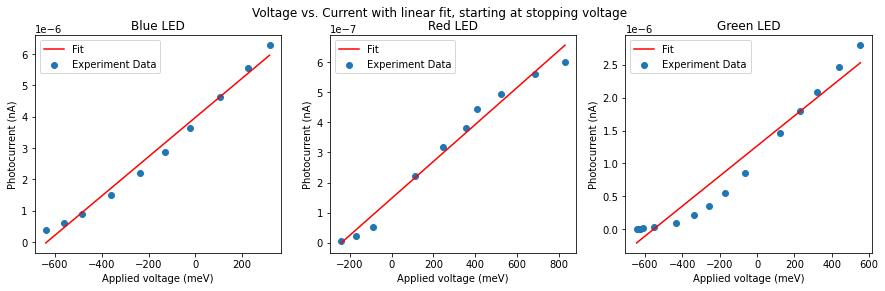

In [35]:
opt_blue, cov = opt.curve_fit(linear, linear_blue, current_blue_linear)
m_b, b_b = opt_blue

opt_red, cov = opt.curve_fit(linear, linear_red, current_red_linear)
m_r , b_r = opt_red

opt_green, cov = opt.curve_fit(linear, linear_green, current_green_linear)
m_g , b_g = opt_green


# Plotting
figure, axes = plt.subplots(1, 3)
figure.suptitle('Voltage vs. Current with linear fit, starting at stopping voltage')
figure.set_figwidth(15)


axes[0].scatter(linear_blue, current_blue_linear * 10 **(-9) , label = 'Experiment Data')
axes[0].plot(linear_blue, (m_b * linear_blue + b_b)* 10 **(-9), color = 'r', label='Fit')
axes[0].set_xlabel("Applied voltage (meV)")
axes[0].set_ylabel("Photocurrent (nA)")
axes[0].legend()
axes[0].set_title("Blue LED")

axes[1].scatter(linear_red, current_red_linear * 10 **(-9), label ='Experiment Data')
axes[1].plot(linear_red, (m_r * linear_red + b_r) * 10 **(-9), color = 'r', label = 'Fit')
axes[1].set_xlabel("Applied voltage (meV)")
axes[1].set_ylabel("Photocurrent (nA)")
axes[1].legend()
axes[1].set_title("Red LED")

axes[2].scatter(linear_green, current_green_linear * 10 **(-9), label='Experiment Data')
axes[2].plot(linear_green, (m_g * linear_green + b_g)* 10 **(-9), color = 'r', label = 'Fit')
axes[2].set_xlabel("Applied voltage (meV)")
axes[2].set_ylabel("Photocurrent (nA)")
axes[2].legend()
axes[2].set_title("Green LED")
plt.show()

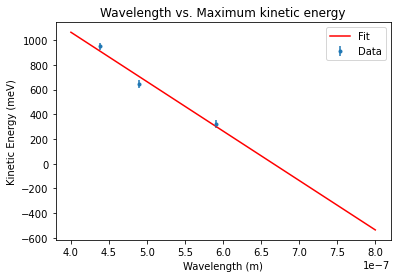

In [251]:
wavelength = np.array([438, 591, 490]) * 10 **(-9)
kinetic = np.array([950, 320, 645])


optimize, cov = opt.curve_fit(linear, wavelength, kinetic)
m, b = optimize
dm, db = np.sqrt(np.diag(cov))

x_values = np.linspace(4 * 10**(-7), 8.0 * 10 ** (-7))

plt.errorbar(wavelength, kinetic, yerr = 30, label = 'Data', fmt='.')
plt.plot(x_values, m * x_values + b, label ='Fit', c = 'r')
plt.title("Wavelength vs. Maximum kinetic energy")
plt.xlabel("Wavelength (m)")
plt.ylabel("Kinetic Energy (meV)")
plt.legend()
plt.show()

In [128]:
optimize, cov = opt.curve_fit(linear, kinetic, wavelength)
m, b = optimize
dm, db = np.sqrt(np.diag(cov))

c = 3 * 10 ** 8
frequency = c/b
dfrequency = c * db/(b)**2

v_stop = np.array([-0.935, -0.250, -0.645])
LED_wavelength = np.array([438, 591, 490]) * 10 ** -9
err_LED = np.array([133, 143, 136]) * 10 ** -9

h = v_stop/(c/LED_wavelength - frequency)

alpha_h = np.array([np.sqrt((0.01/(c/LED_wavelength[i] - frequency))**2 + (v_stop[i]/(c/LED_wavelength[i] - frequency)**2 * dfrequency)**2 + (v_stop[i]/(c/LED_wavelength[i] - frequency)**2 * (c/err_LED[i]))**2) for i in range(len(v_stop))])
print(alpha_h)
print(h)

# crit = (19.54 - b)/m

# f = [6.845 * 10**14, 5.073 * 10**14, 6.118 * 10**14]
# alpha_eV = 0.1

# wavelengths = [438, 591, 490]
# alpha_lambda = 0.1

# alpha_f = [3.0*10**8/((wavelengths[i] * 10**-9)**2) * (alpha_lambda* 10 ** -9) for i in range(len(wavelengths))]

# alpha_h = [np.sqrt(((1/(f[i] - 4.534 * 10**14)) * 0.1)**2 + ((alpha_f[i] * 10 ** -9)**2/(f[i] - 4.534 * 10**14))+ (6.8 * 10 ** 5)**2/(f[i] - 4.534 * 10**14)) for i in range(len(f))]

# print(alpha_h)
# print(alpha_f)

[3.93059491e-14 1.77717891e-13 5.63121430e-14]
[-4.03638197e-15 -4.60186518e-15 -4.05771433e-15]


In [60]:
alpha_h = [alpha_h[i] * 10**15 for i in range(len(alpha_h))]
h = [4.11 * 10 ** -15, 4.48 * 10 ** -15, 4.07 * 10 ** -15]

alpha_phi = [alpha_h[i] * f[i] + h[i] * alpha_f[i] for i in range(len(alpha_h))]
print(alpha_phi)

[0.03061839295354941, 0.046987181234172844, 0.033055276686200896]


# Experiment 4

In [63]:
v_green = np.array([623,557,419,325,226,126,34,-102,-208,-320,-360,-381,-430,-498,-532,-568,-654,-686]) #mV or meV
i_green = np.array([198,185,165,147,127,103,76,45,23,10,7,5,5,3,3,1,0,0]) #nA

v_purple = np.array([654,533,411,307,190,64,-83,-178,-266,-423,-531,-638,-749,-875,-968,-1040,-1120,-1130,-1140,-1150,-1180,-1230])
i_purple = np.array([1079,979,886,792,681,570,420,342,274,176,123,85,49,21,9,3,1,1,1,1,0,0])

v_red = np.array([576,470,343,229,139,23,-21,-91,-148,-156,-187,-206,-215,-294,-488,-644])
i_red = np.array([305,278,233,185,143,83,58,23,10,7,3,1,-1,-3,-3,-3])

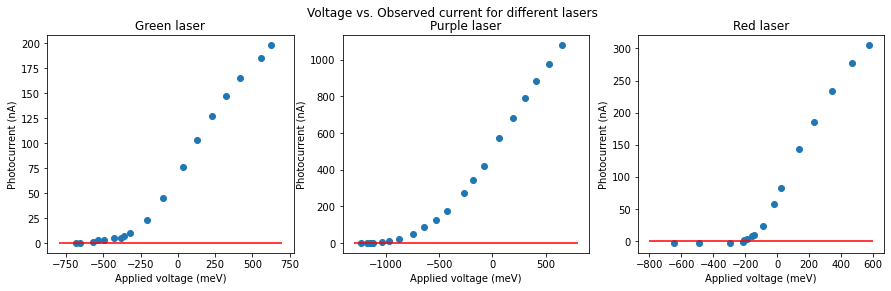

In [216]:
figure, axes = plt.subplots(1, 3)
figure.suptitle('Voltage vs. Observed current for different lasers')
figure.set_figwidth(15)
axes[0].scatter(v_green, i_green)
axes[0].set_title('Green laser')
axes[0].hlines(0, -800 , 700, color = 'r')
axes[0].set_xlabel("Applied voltage (meV)")
axes[0].set_ylabel("Photocurrent (nA)")

axes[1].scatter(v_purple, i_purple )
axes[1].set_title('Purple laser')
axes[1].hlines(0, -1300, 800, color = 'r')
axes[1].set_xlabel("Applied voltage (meV)")
axes[1].set_ylabel("Photocurrent (nA)")

axes[2].scatter(v_red, i_red)
axes[2].set_title('Red laser')
axes[2].hlines(0, -800, 1 * 600, color = 'r')
axes[2].set_xlabel("Applied voltage (meV)")
axes[2].set_ylabel("Photocurrent (nA)")
plt.show()

In [221]:
v_red[i_red < 5]

array([-187, -206, -215, -294, -488, -644])

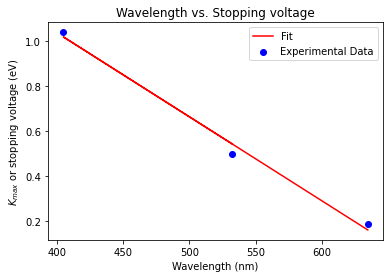

In [235]:
v_stop = np.array([-498, -1040, -187])
wavelengths = np.array([532, 405, 634.6])

optimize, cov = opt.curve_fit(linear, wavelengths, -v_stop/1000)
slope, y_int = optimize

plt.scatter(wavelengths, -v_stop/1000, c = 'b', label = 'Experimental Data')
plt.plot(wavelengths, slope * wavelengths + y_int, label = 'Fit', c = 'r')
plt.xlabel("Wavelength (nm)")
plt.ylabel("$K_{max}$ or stopping voltage (eV)")
plt.title("Wavelength vs. Stopping voltage")
plt.legend()
plt.show()

In [236]:
# x_values = np.linspace(500, 1000)
# y_values = slope * x_values + y_int

# critical = x_values[abs(y_values) < 0.01]
# print(critical)

# plt.scatter(x_values, y_values)

optimize2, cov2 = opt.curve_fit(linear, -v_stop/1000, wavelengths)
slope2, y_int2 = optimize2

dslope2, dyint2 = np.sqrt(np.diag(cov2))

print(y_int2, dyint2)

676.3941423654503 16.833518980671872


In [237]:
c = 3 * 10 ** 8
freq = c/(y_int2 * 10 ** -9)
dfreq = c * dyint2 * 10 ** -9/(y_int2* 10 ** -9)**2

print(freq, dfreq)

443528382654018.3 11038155093660.195


In [241]:
frequencies = np.array(c/(wavelengths*10**-9))
h = np.array([(-v_stop[i]/1000)/(frequencies[i] - freq) for i in range(len(frequencies))])

alpha_h = [np.sqrt((0.01/(frequencies[i] - freq))**2  + (-v_stop[i]/1000/(frequencies[i] - freq)**2 * dfreq)**2) for i in range(len(frequencies))]
print(alpha_h)
print(h)

[3.8831055012465126e-16, 1.342408123271741e-16, 2.4432629902425464e-15]
[4.13685199e-15 3.49918155e-15 6.40184035e-15]


In [243]:
work_function = h * freq
print(work_function)

alpha_phi = [np.sqrt((alpha_h[i] * freq)**2 + (h[i] * dfreq)**2) for i in range(len(h))]
print(alpha_phi)

[1.83481127 1.55198633 2.8393979 ]
[0.1781773908379211, 0.07097054228896599, 1.0859580307216294]
